In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import glob
from google.colab import drive
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#Importing Dataset

In [ ]:
df=pd.read_csv("C:\\Users\\RedPr\\Downloads\\Data file.csv")

In [ ]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [ ]:
df.shape

(209593, 37)

In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [ ]:
y=[]
m=[]
d=[]
for i in df['pdate']:
  y.append(i[:4])
  m.append(i[5:7])
  d.append(i[8:])
df['year']=y
df["month"]=m
df["day"]=d
df=df.drop(["pdate"],axis=1)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,year,month,day
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,07,20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,08,10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,08,19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,06,06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,06,22


In [ ]:
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq
msisdn,209593,186243,04581I85330,7
pcircle,209593,1,UPW,209593
year,209593,1,2016,209593
month,209593,3,07,85765
day,209593,31,11,8092


- There are 11.14% duplicate values in msisdn (mobile number).

In [ ]:
df = df.drop_duplicates(subset = 'msisdn',keep='first')
df.shape

(186243, 39)

- Since registered moble no. has to be unique, we drop these duplicate values from the msisdn column.

#Visualization

UPW    186243
Name: pcircle, dtype: int64


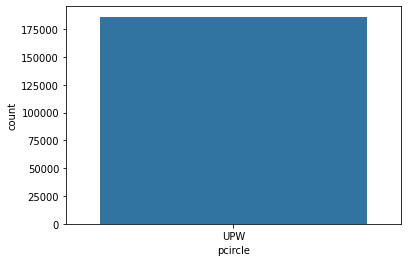

In [ ]:
sns.countplot(df["pcircle"])
print(df["pcircle"].value_counts())

1    160383
0     25860
Name: label, dtype: int64


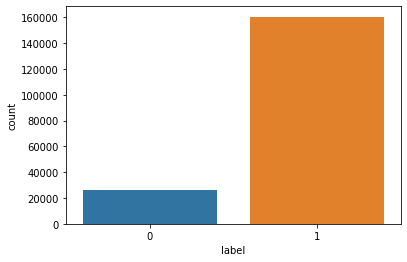

In [ ]:
sns.countplot(df["label"])
print(df["label"].value_counts())

2016    186243
Name: year, dtype: int64


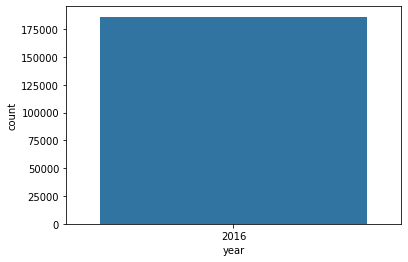

In [ ]:
sns.countplot(df["year"])
print(df["year"].value_counts())

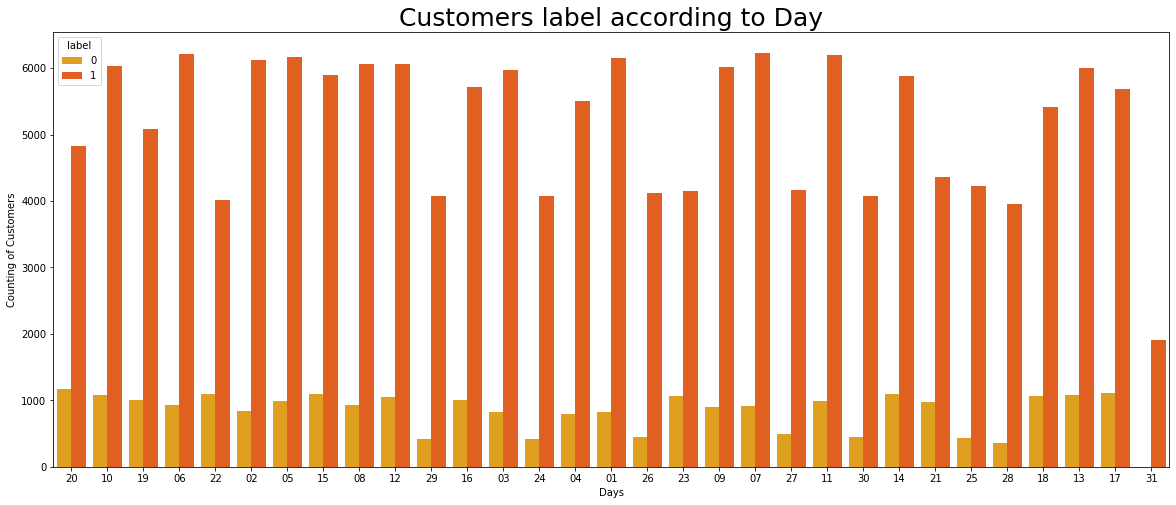

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x="day", hue='label', data=df, palette='autumn_r')
plt.title("Customers label according to Day", fontsize=25)
plt.xlabel('Days')
plt.ylabel('Counting of Customers')
plt.show()

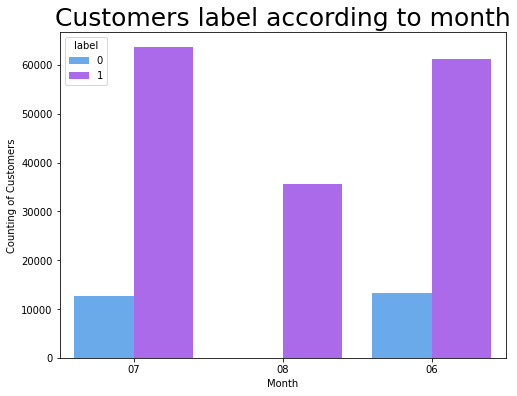

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="month", hue='label', data=df, palette='cool')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()

Month Count
07    76306
06    74308
08    35629
Name: month, dtype: int64


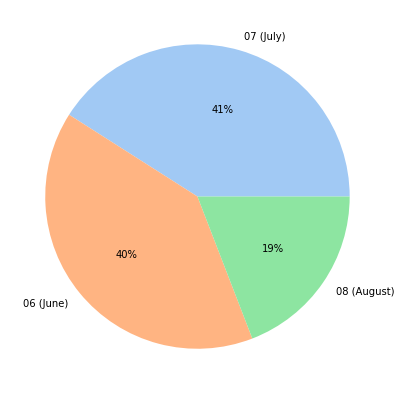

In [ ]:
plt.figure(figsize=(15,7))
month_sold=pd.DataFrame(df["month"].value_counts())
palette_color = sns.color_palette('pastel')
l=["07 (July)","06 (June)","08 (August)"]
plt.pie(month_sold,labels=l,colors=palette_color, autopct='%.0f%%')
print("Month Count")
print(df["month"].value_counts())
plt.show()

#Checking Null Values

In [ ]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

# Correlation

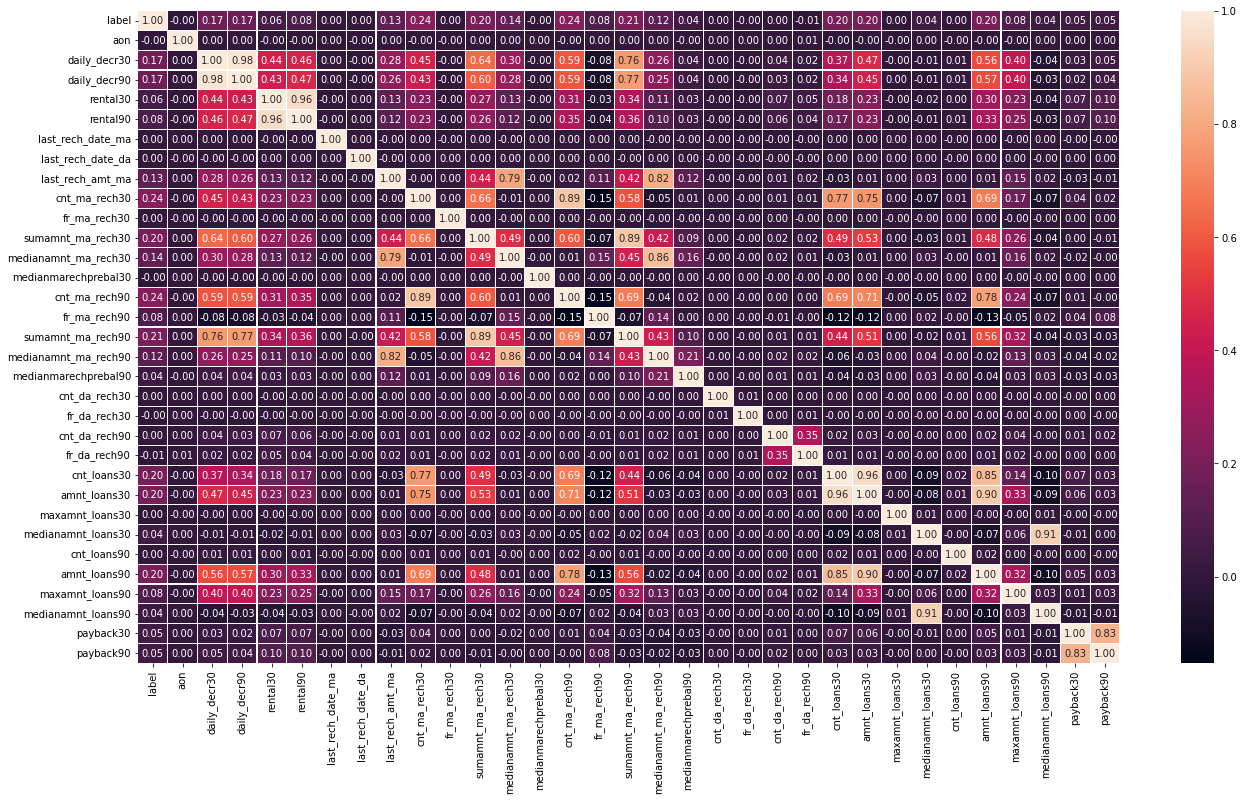

In [ ]:
plt.figure(figsize=(22,12))
sns.heatmap(df.iloc[:,1:].corr(),annot=True,linewidths=0.1,linecolor='white',fmt="0.2f")

In [ ]:
sp=pd.DataFrame(df.iloc[:,1:].corr())
print("Percent correlation of following features with target column Price\n")
round(sp["label"]*100)


Percent correlation of following features with target column Price



label                   100.0
aon                      -0.0
daily_decr30             17.0
daily_decr90             17.0
rental30                  6.0
rental90                  8.0
last_rech_date_ma         0.0
last_rech_date_da         0.0
last_rech_amt_ma         13.0
cnt_ma_rech30            24.0
fr_ma_rech30              0.0
sumamnt_ma_rech30        20.0
medianamnt_ma_rech30     14.0
medianmarechprebal30     -0.0
cnt_ma_rech90            24.0
fr_ma_rech90              8.0
sumamnt_ma_rech90        21.0
medianamnt_ma_rech90     12.0
medianmarechprebal90      4.0
cnt_da_rech30             0.0
fr_da_rech30             -0.0
cnt_da_rech90             0.0
fr_da_rech90             -1.0
cnt_loans30              20.0
amnt_loans30             20.0
maxamnt_loans30           0.0
medianamnt_loans30        4.0
cnt_loans90               0.0
amnt_loans90             20.0
maxamnt_loans90           8.0
medianamnt_loans90        4.0
payback30                 5.0
payback90                 5.0
Name: labe

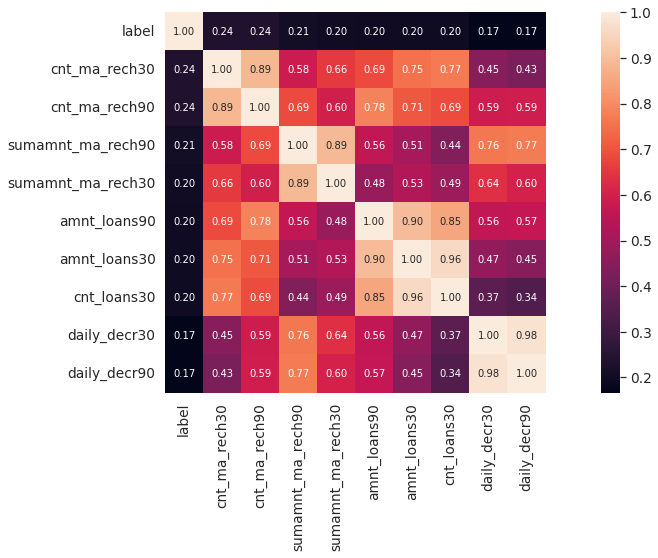

In [ ]:
plt.figure(figsize=(20,7))
k = 10 
cols = df.iloc[:,1:].corr().nlargest(k, "label")["label"].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


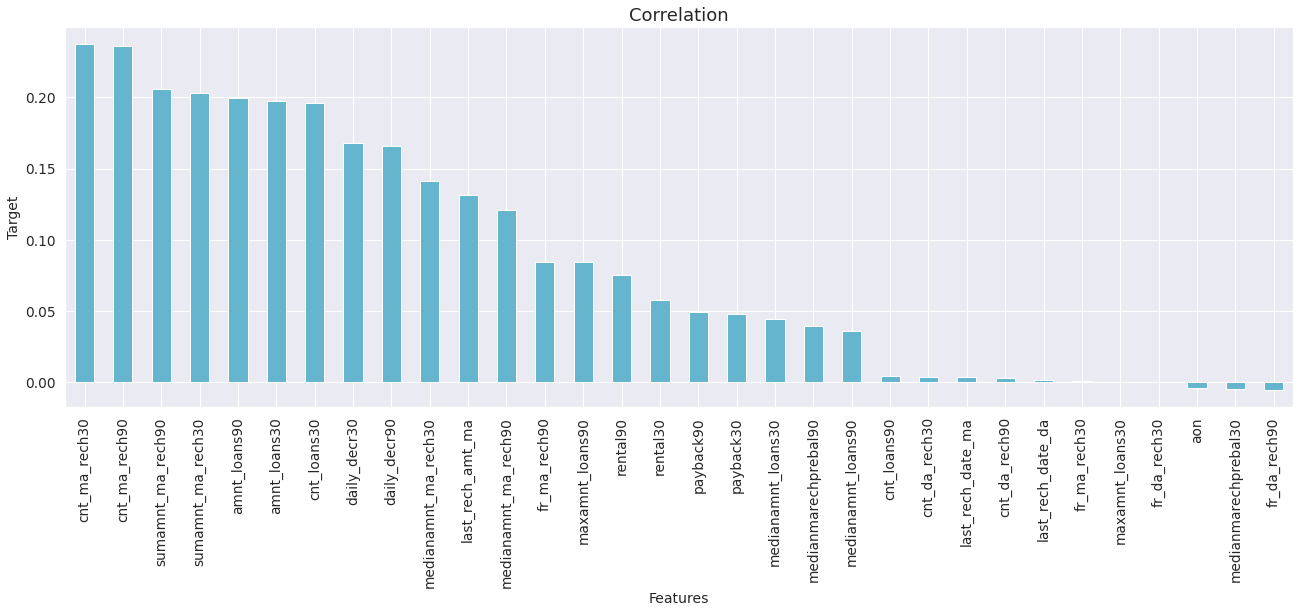

In [ ]:
plt.figure(figsize=(22,7))
df.iloc[:,1:].corr()["label"].sort_values(ascending=False).drop(["label"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Negative correlation with traget colum
- Max -ve correlation: fr_da_rech90 
- Min -ve correlation: aon

Positive correlation with traget colum
- Max +ve correlation: cnt_ma_rech30
- Min +ve correlation: last_rech_date_da 

#Describing Data

In [ ]:
df.iloc[:,1:].describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


- There is huge gap between 75% and Max value which indicates presence of outlier in some of the features.

- Data is widely spread in most of the features.

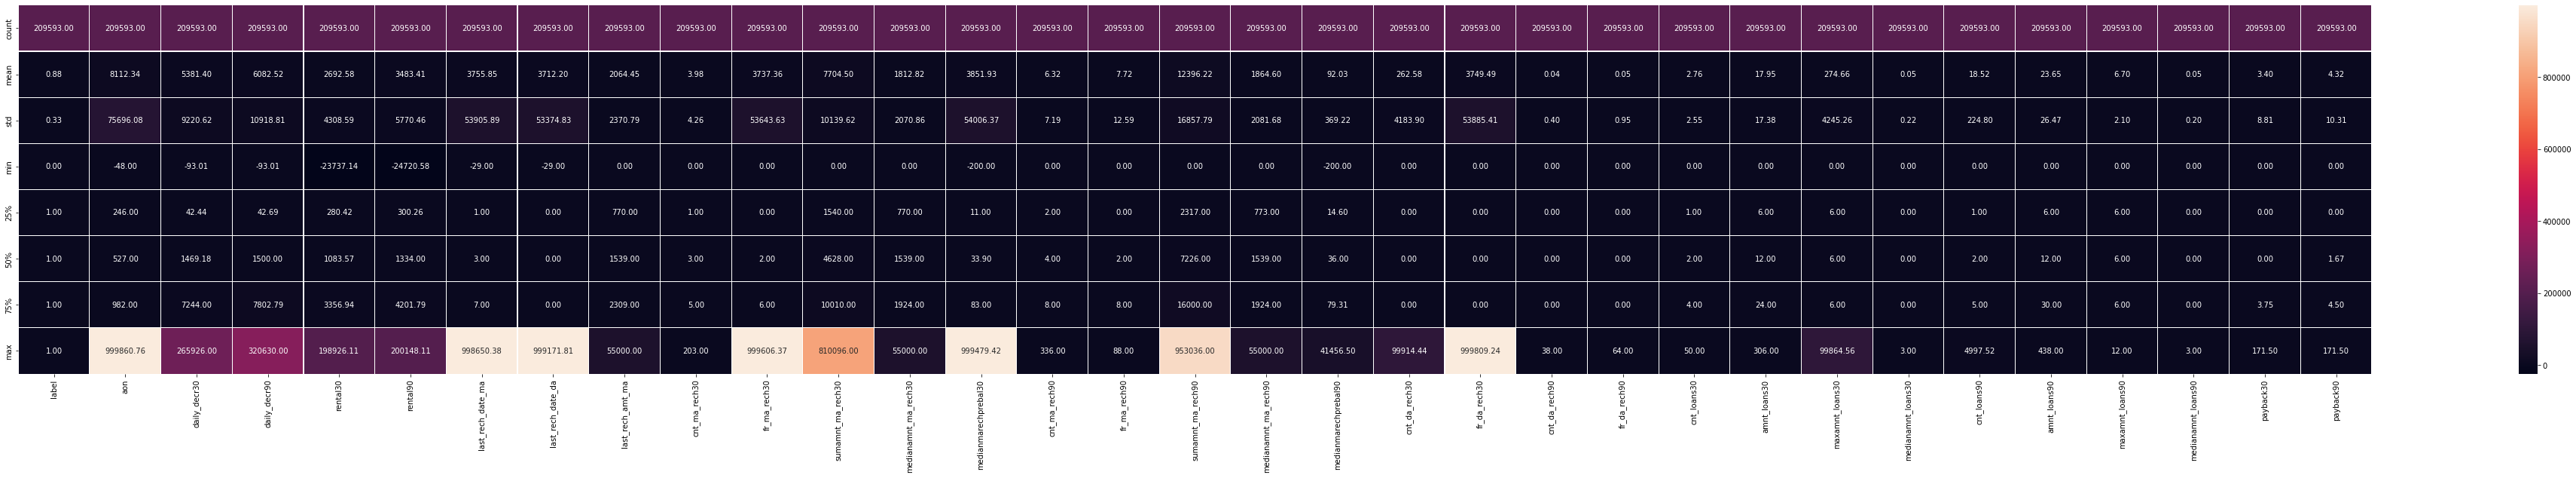

In [ ]:
plt.figure(figsize=(70,9))
sns.heatmap(df.iloc[:,1:].describe(),annot=True,linewidths=0.1,linecolor='white',fmt="0.2f")

# Checking Outliers

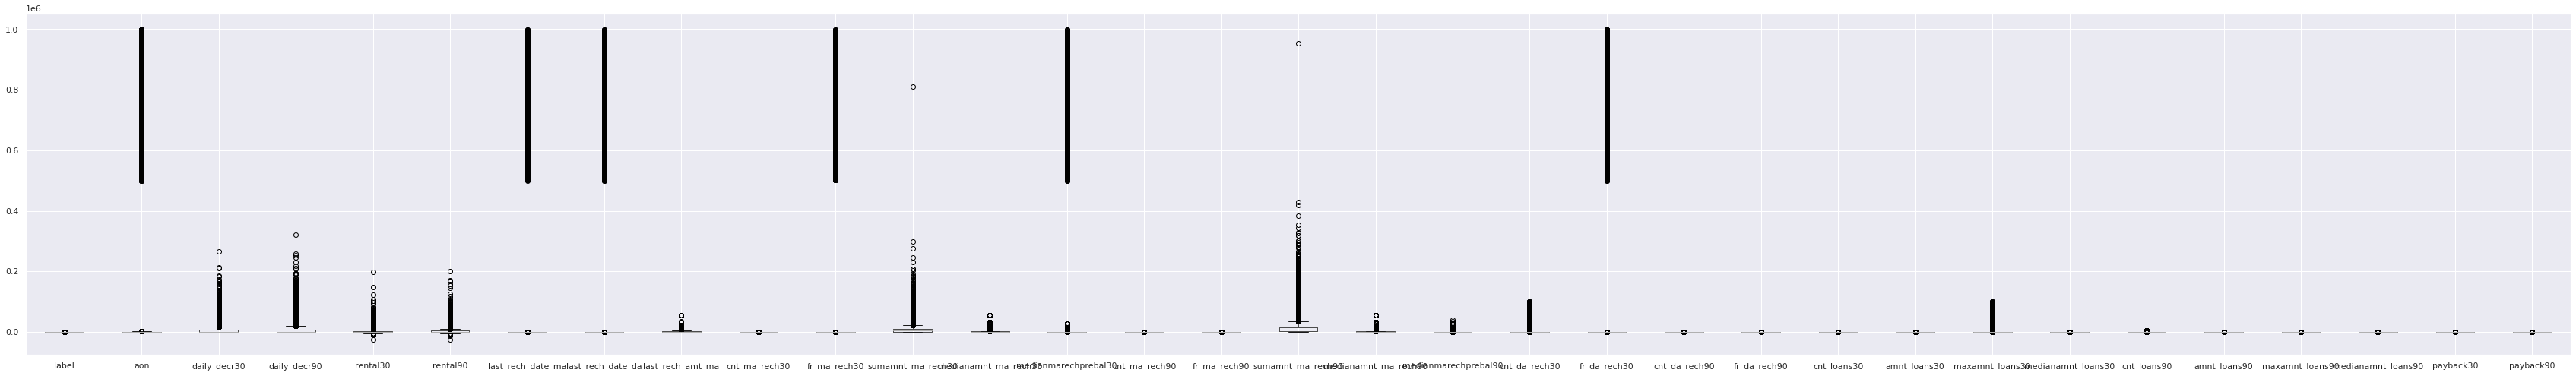

In [ ]:
import matplotlib.pyplot as plt
df.iloc[:,1:].boxplot(figsize=(60,8))
plt.subplots_adjust(bottom=0.1)
plt.show()

In [ ]:
df1=df.copy()
df1.drop(columns=['msisdn','day','month','year','pcircle'],axis=1,inplace=True)

- Dropping Categorical column to check outliers.

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
print(z)

        Unnamed: 0     label       aon  daily_decr30  daily_decr90  rental30  \
0         1.666030  2.490376  0.103778      0.227755      0.254478  0.562600   
1         1.666013  0.401546  0.097978      0.807466      0.621635  0.246261   
2         1.665997  0.401546  0.100311      0.416949      0.415701  0.404143   
3         1.665980  0.401546  0.104187      0.574142      0.548842  0.576747   
4         1.665964  0.401546  0.094881      0.559369      0.536329  0.357824   
...            ...       ...       ...           ...           ...       ...   
209585    1.799386  0.401546  0.096910      0.034307      0.032920  0.475292   
209587    1.799419  0.401546  0.104213      1.099298      0.871150  2.400346   
209588    1.799435  0.401546  0.102038      0.559226      0.536208  0.360087   
209591    1.799485  0.401546  0.084533      0.849280      0.665116  0.517929   
209592    1.799502  0.401546  0.086524      0.063992      0.112353  0.501130   

        rental90  last_rech_date_ma  la

In [ ]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 186234, 186239, 186239]), array([16, 16, 33, ...,  4, 27, 31]))


In [ ]:
df1_new=df1[(z<3).all(axis=1)]

In [ ]:
print(df1.shape,'\t\t',df1_new.shape)

(186243, 34) 		 (143188, 34)


- There is almost 24% data loss, if outliers are removed.
- Since it is advised that we cannot lose more than 7% data and to retain maximum data, we avoid removing outliers.

# EDA Concluding Remarks

- No null values were detected.

- Some features such as label, pdate, pcircle, msisdn are redundant for analysis.

- The feature with strongest positive correlation with target feature is cnt_ma_rech30. 

- The feature with strongest negative correlation with target feature is fr_da_rech90.

- There are total of 186243 customers who have taken micro credit loan.

-	160383 customers have paid loan while 25860 customers have not paid. 

-	In August, 2016 there are 0 customers who are in defaulters.

-	June, July and August have more than +30k customer who have paid the loan

-	Percentage of customers who have taken micro credit loan from June to August 2016 are as follows, 41% customer in July, 40% in June and 19% in August. 




#Separating input and target features

In [ ]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

- Pcircle has only one value hence we drop

In [ ]:
x=df.drop(["Unnamed: 0","label","pcircle","year"],axis=1)
x.head()

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,07,20
1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,08,10
2,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,08,19
3,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,06,06
4,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,06,22


In [ ]:
y=df["label"]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

#Encoding Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()

In [ ]:
x["msisdn"]=lenc.fit_transform(x["msisdn"].values.reshape(-1,1))

In [ ]:
list2=["month","day"]
for i in list2:
  x[i]=x[i].astype(int)
x.dtypes

msisdn                    int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

# Detecting Skewness

In [ ]:
x.skew().sort_values()

msisdn                 -2.073036e-19
day                     2.007065e-01
month                   3.512926e-01
maxamnt_loans90         1.650198e+00
fr_ma_rech90            2.250443e+00
cnt_loans30             2.737584e+00
amnt_loans30            3.006644e+00
amnt_loans90            3.165962e+00
cnt_ma_rech30           3.471313e+00
medianamnt_ma_rech30    3.519213e+00
cnt_ma_rech90           3.558616e+00
medianamnt_ma_rech90    3.753115e+00
last_rech_amt_ma        3.830612e+00
daily_decr30            4.003019e+00
daily_decr90            4.301490e+00
medianamnt_loans30      4.470128e+00
rental90                4.530925e+00
rental30                4.676793e+00
medianamnt_loans90      4.774958e+00
sumamnt_ma_rech90       5.231693e+00
payback90               6.763241e+00
sumamnt_ma_rech30       7.134012e+00
payback30               8.193009e+00
aon                     1.036503e+01
medianmarechprebal30    1.467754e+01
fr_da_rech30            1.472861e+01
last_rech_date_da       1.478182e+01
f

- Keeping +/- 0.5 as the range of skewness, the numeric features that contain skewness are listed in below list named 'lis'. 


In [ ]:
list3=[]
for i in x:
  list3.append(i)

list3.remove("msisdn")
list3.remove("month")
list3.remove("day")

- Removing categorical columns from list

In [ ]:
len(list3)

32

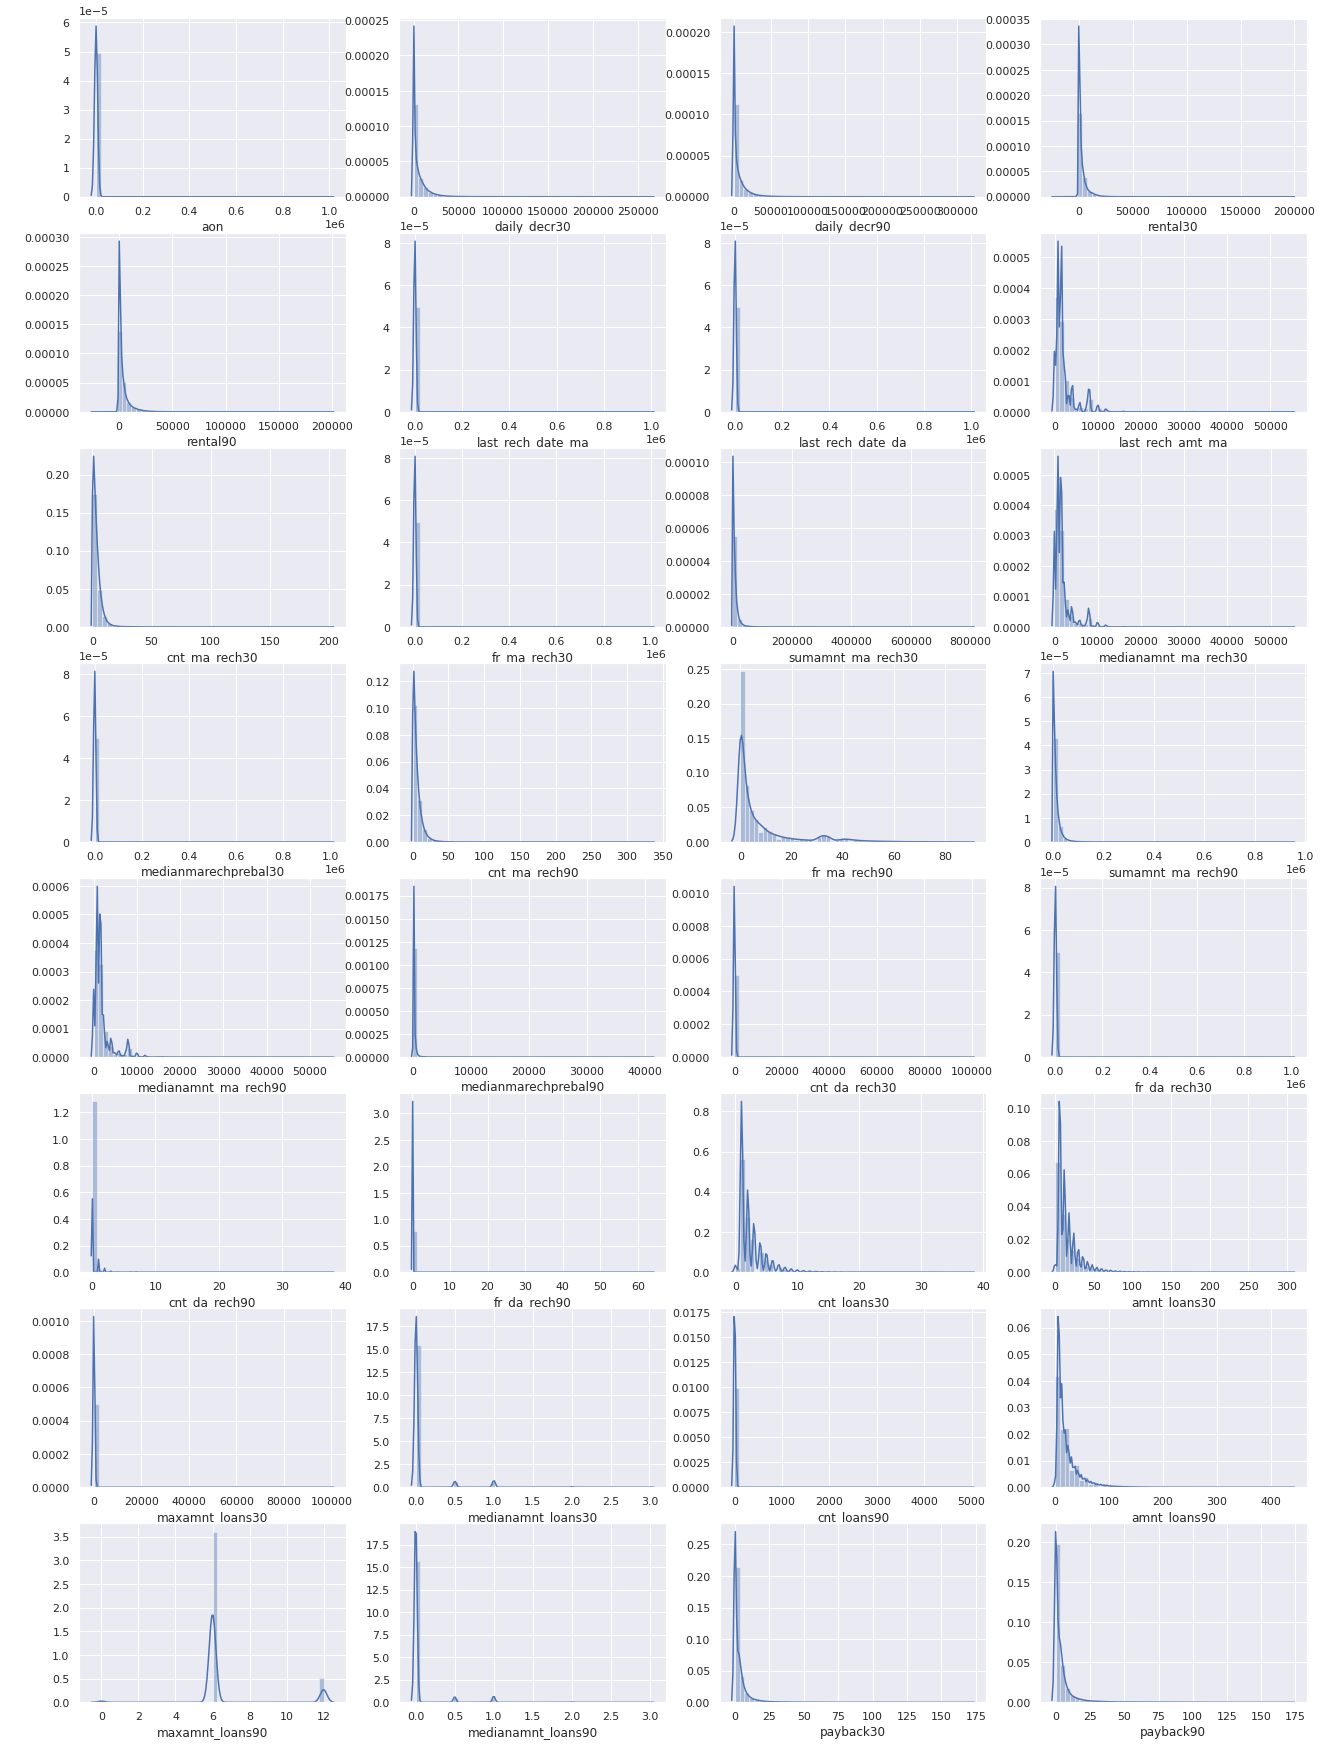

In [ ]:
sns.set()
fig,axes=plt.subplots(8,4,figsize=(22,30))
plt.subplots_adjust(bottom=0.1)
k=0
j=0
for i in list3:
    sns.distplot(x[i],ax=axes[j,k])
    axes[j,k].set_ylabel(" ")
    k=k+1
    
    if k==4:
      k=0
      j=j+1

- Most of the features are right skewed

In [ ]:
x2=x.copy()
x2['medianmarechprebal90']=np.cbrt(x2['medianmarechprebal90'])

In [ ]:
x2['medianmarechprebal90'].skew()

0.5550692026045007

In [ ]:
list3.remove('medianmarechprebal90')

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
for i in list3:
  x2[i]=qt.fit_transform(x2[i].values.reshape(-1,1))

In [ ]:
x2.skew()

msisdn                 -2.073036e-19
aon                    -1.571218e-04
daily_decr30            1.565198e-04
daily_decr90           -1.631770e-03
rental30                1.783008e-03
rental90                1.911681e-04
last_rech_date_ma       3.308857e-02
last_rech_date_da       5.248084e+00
last_rech_amt_ma       -7.825671e-02
cnt_ma_rech30          -1.150997e-01
fr_ma_rech30           -3.424723e-02
sumamnt_ma_rech30      -1.175243e-01
medianamnt_ma_rech30   -1.230627e-01
medianmarechprebal30    2.133637e-02
cnt_ma_rech90          -8.210942e-02
fr_ma_rech90           -1.328452e-01
sumamnt_ma_rech90      -8.549747e-02
medianamnt_ma_rech90   -8.633389e-02
medianmarechprebal90    5.550692e-01
cnt_da_rech30           6.884901e+00
fr_da_rech30            1.143287e+01
cnt_da_rech90           5.961745e+00
fr_da_rech90            1.566311e+01
cnt_loans30             2.355911e-01
amnt_loans30            1.904437e-01
maxamnt_loans30         1.527042e+00
medianamnt_loans30      3.382142e+00
c

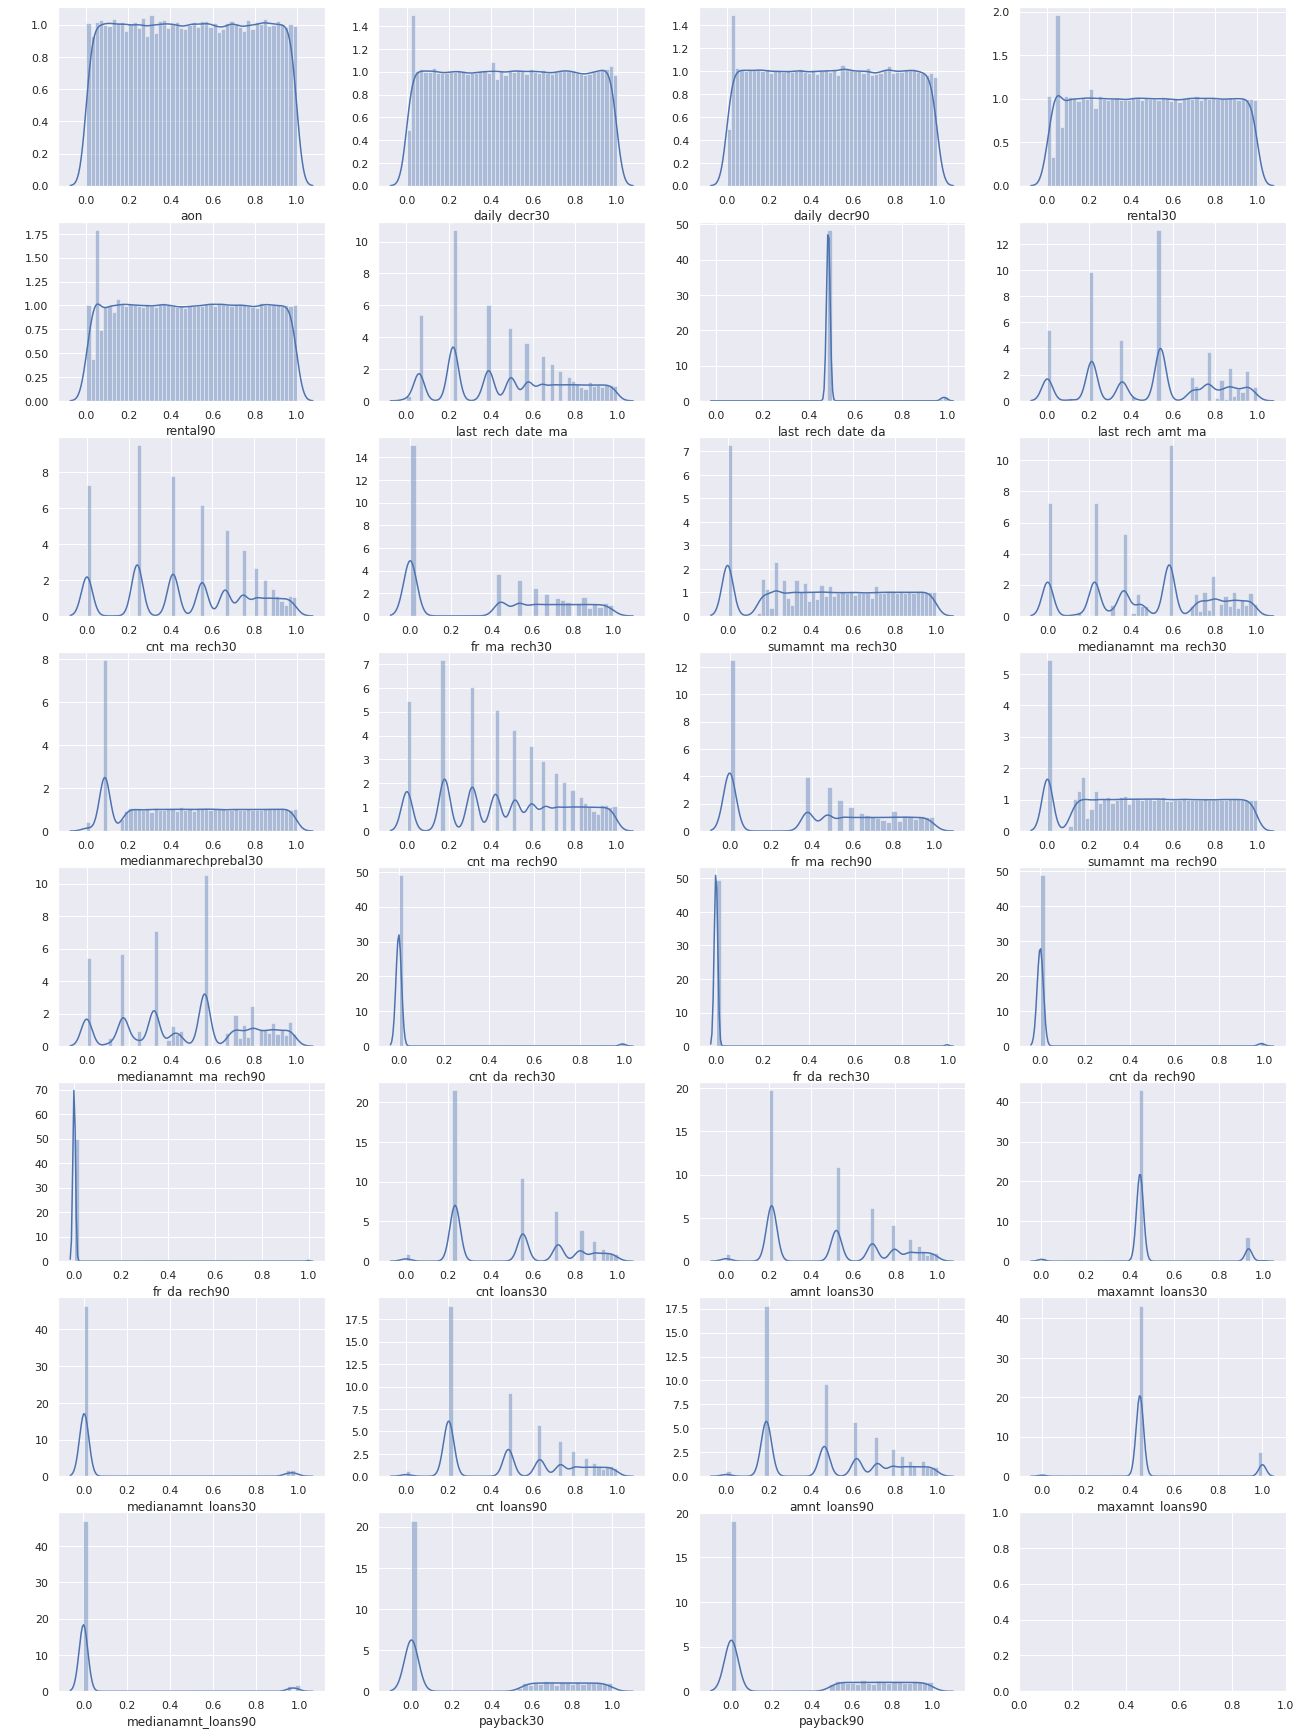

In [ ]:
sns.set()
fig,axes=plt.subplots(8,4,figsize=(22,30))
plt.subplots_adjust(bottom=0.1)
k=0
j=0
for i in list3:
    sns.distplot(x2[i],ax=axes[j,k])
    axes[j,k].set_ylabel(" ")
    k=k+1
    
    if k==4:
      k=0
      j=j+1

# Detecting Collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(x2)

,variables,VIF
0,msisdn,3.981527
1,aon,4.141602
2,daily_decr30,1191.098404
3,daily_decr90,1282.152663
4,rental30,100.868612
5,rental90,114.090377
6,last_rech_date_ma,6.336924
7,last_rech_date_da,115.387052
8,last_rech_amt_ma,16.747997
9,cnt_ma_rech30,108.909037


- VIF<5, hence there is no collinearity

In [ ]:
X=x2.drop(['daily_decr30','rental30','amnt_loans30','cnt_loans90'],axis=1)
calc_vif(X)

,variables,VIF
0,msisdn,3.979052
1,aon,4.137245
2,daily_decr90,18.614023
3,rental90,7.266654
4,last_rech_date_ma,6.313495
5,last_rech_date_da,112.234346
6,last_rech_amt_ma,16.742869
7,cnt_ma_rech30,108.635839
8,fr_ma_rech30,5.393657
9,sumamnt_ma_rech30,128.172846


# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_new,y_new=smt.fit_resample(X,y)
y=y_new
y.value_counts()

0    160383
1    160383
Name: label, dtype: int64

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
mns=MinMaxScaler()
s=mns.fit_transform(x_new)
x=pd.DataFrame(data=s)
print(x)

              0         1         2         3         4         5         6   \
0       0.215800  0.286286  0.602618  0.240240  0.388889  0.484484  0.540541   
1       0.764011  0.620120  0.847129  0.729511  0.925926  0.484484  0.909409   
2       0.180378  0.509510  0.502342  0.430954  0.494494  0.484484  0.540541   
3       0.559256  0.251251  0.179702  0.187103  0.976476  0.484484  0.406907   
4       0.037102  0.738238  0.383353  0.470478  0.576076  0.484484  0.767768   
...          ...       ...       ...       ...       ...       ...       ...   
320761  0.993900  0.031569  0.030311  0.557105  0.873930  0.484484  0.876239   
320762  0.293860  0.142516  0.430481  0.197908  0.370055  0.484484  0.288812   
320763  0.845873  0.240028  0.080406  0.382308  0.307303  0.484484  0.211211   
320764  0.742706  0.594154  0.147386  0.719620  0.060060  0.484484  0.000000   
320765  0.279373  0.610474  0.361990  0.357808  0.519209  0.484484  0.350446   

              7         8         9   .

# Training Dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve,auc,classification_report,confusion_matrix
lg=LogisticRegression()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)
lg.fit(x_train,y_train)
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)
print("Accuracy of training model :",round(accuracy_score(y_train,pred_train)*100,2))
print("Accuracy of test data :",round(accuracy_score(y_test,pred_test)*100,2))
cv_score=cross_val_score(lg,x,y,cv=5)
print("cv score : ", round(cv_score.mean()*100,2))
logloss = log_loss(y_test, lg.predict_proba(x_test))
print("Log loss: ",logloss)
print("\nClassification report for test data\n",classification_report(y_test,pred_test))
print("Classification report for training data\n",classification_report(y_train,pred_train))
print("Confusion Matrix\n",confusion_matrix(y_test,pred_test))

Accuracy of training model : 80.96
Accuracy of test data : 81.02
cv score :  80.82
Log loss:  0.4341528764197971

Classification report for test data
               precision    recall  f1-score   support

           0       0.80      0.83      0.81     32066
           1       0.82      0.79      0.81     32088

    accuracy                           0.81     64154
   macro avg       0.81      0.81      0.81     64154
weighted avg       0.81      0.81      0.81     64154

Classification report for training data
               precision    recall  f1-score   support

           0       0.80      0.83      0.81    128317
           1       0.82      0.79      0.81    128295

    accuracy                           0.81    256612
   macro avg       0.81      0.81      0.81    256612
weighted avg       0.81      0.81      0.81    256612

Confusion Matrix
 [[26473  5593]
 [ 6581 25507]]


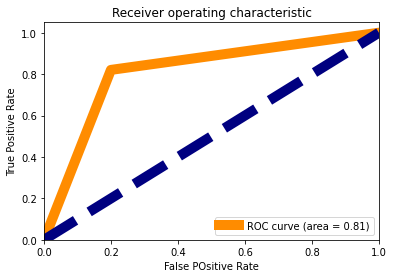

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()

# Model Selection

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    cv_score=cross_val_score(algorithm_instance,x,y,cv=5)
    print("cv score : ", round(cv_score.mean()*100,2))
    logloss = log_loss(y_test, algorithm_instance.predict_proba(x_test))
    print("Log loss: ",logloss)
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   
    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()


# SVC Model

In [ ]:
from sklearn import svm
s=svm.SVC(probability=True)
model_selection(s,x_train,y_train,x_test,y_test)

Accuracy of training model : 89.02
Accuracy of test data : 88.93


#KNeighborsClassifier

Accuracy of training model : 93.18
Accuracy of test data : 89.47
cv score is  89.14

Classification report for test data
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     32066
           1       0.92      0.86      0.89     32088

    accuracy                           0.89     64154
   macro avg       0.90      0.89      0.89     64154
weighted avg       0.90      0.89      0.89     64154

Classification report for training data
               precision    recall  f1-score   support

           0       0.91      0.96      0.93    128317
           1       0.96      0.90      0.93    128295

    accuracy                           0.93    256612
   macro avg       0.93      0.93      0.93    256612
weighted avg       0.93      0.93      0.93    256612

Confusion Matrix
 [[29740  2326]
 [ 4431 27657]]




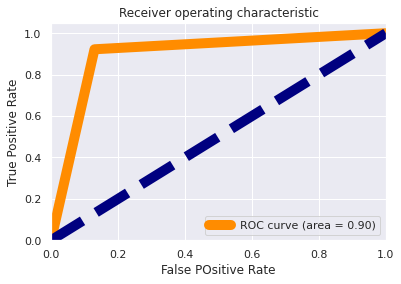

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# DecisionTressClassifier Model

Accuracy of training model : 100.0
Accuracy of test data : 91.1
cv score :  88.71
Log loss:  3.0746477537072496

Classification report for test data
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     32066
           1       0.91      0.91      0.91     32088

    accuracy                           0.91     64154
   macro avg       0.91      0.91      0.91     64154
weighted avg       0.91      0.91      0.91     64154

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    128317
           1       1.00      1.00      1.00    128295

    accuracy                           1.00    256612
   macro avg       1.00      1.00      1.00    256612
weighted avg       1.00      1.00      1.00    256612

Confusion Matrix
 [[29309  2757]
 [ 2954 29134]]




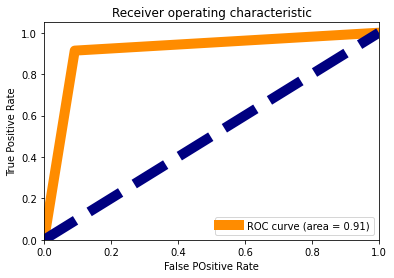

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

#Multinominal Naive Bayes

Accuracy of training model : 75.35
Accuracy of test data : 75.4
cv score :  75.35
Log loss:  0.5229032403278038

Classification report for test data
               precision    recall  f1-score   support

           0       0.74      0.78      0.76     32066
           1       0.77      0.73      0.75     32088

    accuracy                           0.75     64154
   macro avg       0.75      0.75      0.75     64154
weighted avg       0.75      0.75      0.75     64154

Classification report for training data
               precision    recall  f1-score   support

           0       0.74      0.78      0.76    128317
           1       0.77      0.73      0.75    128295

    accuracy                           0.75    256612
   macro avg       0.75      0.75      0.75    256612
weighted avg       0.75      0.75      0.75    256612

Confusion Matrix
 [[24872  7194]
 [ 8588 23500]]




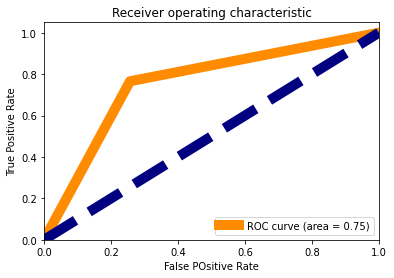

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
model_selection(mnb,x_train,y_train,x_test,y_test)

#Ensemble Method

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'n_estimators':range(0,100,50)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}


Accuracy of training model : 99.99
Accuracy of test data : 94.26
cv score :  91.73
Log loss:  0.17015618121924608

Classification report for test data
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     32066
           1       0.93      0.96      0.94     32088

    accuracy                           0.94     64154
   macro avg       0.94      0.94      0.94     64154
weighted avg       0.94      0.94      0.94     64154

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    128317
           1       1.00      1.00      1.00    128295

    accuracy                           1.00    256612
   macro avg       1.00      1.00      1.00    256612
weighted avg       1.00      1.00      1.00    256612

Confusion Matrix
 [[29566  2500]
 [ 1182 30906]]




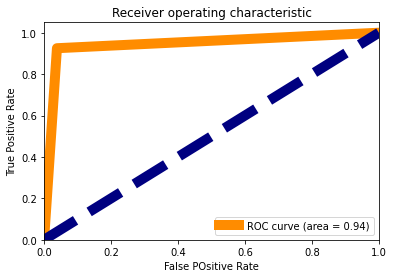

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, class_weight= 'balanced',criterion='gini', max_features= 'sqrt')
model_selection(rf,x_train,y_train,x_test,y_test)

# GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,50)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'deviance', 'max_features': 'auto', 'n_estimators': 50}


Accuracy of training model : 89.98
Accuracy of test data : 89.98
cv score :  89.01
Log loss:  0.27177032037491716

Classification report for test data
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     32066
           1       0.91      0.89      0.90     32088

    accuracy                           0.90     64154
   macro avg       0.90      0.90      0.90     64154
weighted avg       0.90      0.90      0.90     64154

Classification report for training data
               precision    recall  f1-score   support

           0       0.89      0.91      0.90    128317
           1       0.91      0.89      0.90    128295

    accuracy                           0.90    256612
   macro avg       0.90      0.90      0.90    256612
weighted avg       0.90      0.90      0.90    256612

Confusion Matrix
 [[29308  2758]
 [ 3668 28420]]




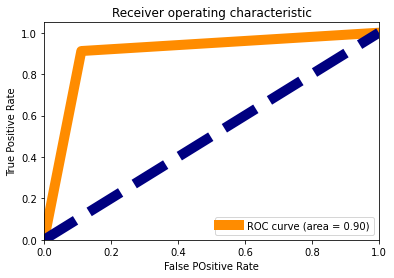

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rf3=GradientBoostingClassifier(criterion='friedman_mse', loss='deviance', max_features= 'auto', n_estimators= 50)
model_selection(rf3,x_train,y_train,x_test,y_test)

# Model Saving

In [ ]:
import pickle
filename='rfz.pk1'
pickle.dump(rf,open(filename,'wb'))

# Loading Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Accuracy: ",result*100)

Model Accuracy:  94.26068522617452


#Conclusion

-	In this study we found that Random forest classifier performs slightly better than logistic regression and rest of the algorithm tested.